In [1]:
from tensorflow import keras
from tensorflow.keras import models, layers, datasets, constraints, activations,\
  optimizers, losses, metrics
from tensorflow.keras.utils import to_categorical
import numpy as np
import time

In [0]:
from tensorflow.keras.datasets import mnist

In [0]:
(train_images_raw, train_labels_raw), (test_images_raw, test_labels_raw) = mnist.load_data()

In [4]:
train_images_raw.shape

(60000, 28, 28)

In [5]:
train_labels_raw

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
network = models.Sequential()
network.add(layers.Dense(512, activation=activations.relu, input_shape=(28*28,)))
network.add(layers.Dense(10, activation=activations.softmax))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
network.compile(optimizer=optimizers.RMSprop(), 
                loss=losses.categorical_crossentropy,
                metrics=[metrics.categorical_accuracy])

In [0]:
def reshape_images(dataset: np.ndarray)->np.ndarray:
  shape = dataset.shape
  if len(shape)==3:
    return dataset.reshape(shape[0], shape[1]*shape[2])
  elif len(shape)==2:
    return dataset
  else:
    raise Exception('len of shape should be 2 or 3')

In [0]:
def norm_images(dataset: np.ndarray)->np.ndarray:
  return dataset.astype(np.float32) / 255

In [0]:
train_images = norm_images(reshape_images(train_images_raw))
test_images = norm_images(reshape_images(test_images_raw))

In [0]:
train_labels = to_categorical(train_labels_raw)
test_labels = to_categorical(test_labels_raw)

In [12]:
network.fit(train_images, train_labels, epochs=5, batch_size=1024)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 1s 11us/sample - loss: 0.5167 - categorical_accuracy: 0.8548
Epoch 2/5
60000/60000 [==============================] - 0s 7us/sample - loss: 0.2413 - categorical_accuracy: 0.9313
Epoch 3/5
60000/60000 [==============================] - 0s 7us/sample - loss: 0.1745 - categorical_accuracy: 0.9508
Epoch 4/5
60000/60000 [==============================] - 0s 7us/sample - loss: 0.1345 - categorical_accuracy: 0.9614
Epoch 5/5
60000/60000 [==============================] - 0s 7us/sample - loss: 0.1104 - categorical_accuracy: 0.9684


In [13]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print(f'test_acc: {test_acc}')

10000/10000 [==============================] - 1s 74us/sample - loss: 0.1179 - categorical_accuracy: 0.9638
test_acc: 0.9638000130653381


In [14]:
x = np.array(12)
x.ndim

0

In [15]:
x = np.array([12,3,6,14,7])
print(x)
x.ndim

[12  3  6 14  7]


1

In [16]:
x = np.array([[5,78,2,34,0],[6,79,3,35,1],[7,80,4,36,2]])
x.ndim

2

In [0]:
import matplotlib.pyplot as plt

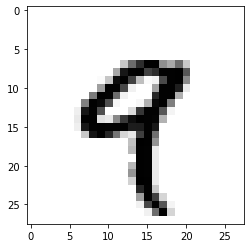

In [18]:
digit = train_images_raw[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [19]:
my_slice = train_images_raw[10:100,:,:]
my_slice.shape

(90, 28, 28)

In [0]:
def naive_relu(x):
  assert len(x.shape)==2
  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i,j] = max(x[i,j], 0)
  return x

In [21]:
x = np.array([[5,78,2,34,0],[6,79,3,35,1],[7,80,4,36,2]])
x.astype(np.float32)
start = time.process_time()
for i in range(int(1e5)):
  z = np.maximum(x, 0.)
print(f"execution time with nparray: {time.process_time() - start} fs")

execution time with nparray: 0.1724076960000005 fs


In [22]:
x = np.array([[5,78,2,34,0],[6,79,3,35,1],[7,80,4,36,2]])
x.astype(np.float32)
start = time.process_time()
for i in range(int(1e5)):
  z = naive_relu(x)
print(f"execution time with naive python: {time.process_time() - start} fs")

execution time with naive python: 1.2936299770000002 fs


In [0]:
# broadcast
def naive_add_matrix_and_vector(x,y):
  assert len(x.shape)==2
  assert len(y.shape)==1
  assert x.shape[1] == y.shape[0]

  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i,j] += y[j]
  return x

In [0]:
x = np.random.random((64,3,32,10))
y = np.random.random((32,10))
z = np.maximum(x,y)
assert z.shape == (64,3,32,10)